In [1]:
data1307 <- read.csv(file="Data/2013-07 - Citi Bike trip data.csv", header=TRUE, sep=",")

In [2]:
data  = data1307 

In [3]:
head(data,2)

tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.75323,-73.97033,504,1 Ave & E 15 St,40.73222,-73.98166,16950,Customer,\N,0
1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.74972,-74.00295,459,W 20 St & 11 Ave,40.74674,-74.00776,19816,Customer,\N,0


In [4]:
summary(data)


  tripduration                   starttime                     stoptime     
 Min.   :     60   2013-07-10 17:33:32:     8   2013-07-29 18:56:51:     9  
 1st Qu.:    444   2013-07-16 18:10:49:     7   2013-07-30 18:34:23:     8  
 Median :    729   2013-07-19 08:33:25:     7   2013-07-16 08:58:00:     7  
 Mean   :    998   2013-07-19 12:17:28:     7   2013-07-17 18:05:57:     7  
 3rd Qu.:   1202   2013-07-24 09:31:34:     7   2013-07-20 16:45:42:     7  
 Max.   :6250750   2013-07-26 17:19:22:     7   2013-07-23 17:18:56:     7  
                   (Other)            :843373   (Other)            :843371  
 start.station.id             start.station.name start.station.latitude
 Min.   :  72.0   W 20 St & 11 Ave     :  8049   Min.   :40.68         
 1st Qu.: 305.0   E 17 St & Broadway   :  7814   1st Qu.:40.72         
 Median : 401.0   West St & Chambers St:  7387   Median :40.74         
 Mean   : 428.4   Pershing Square N    :  7290   Mean   :40.73         
 3rd Qu.: 482.0   Broadw

## Lets visualize data :

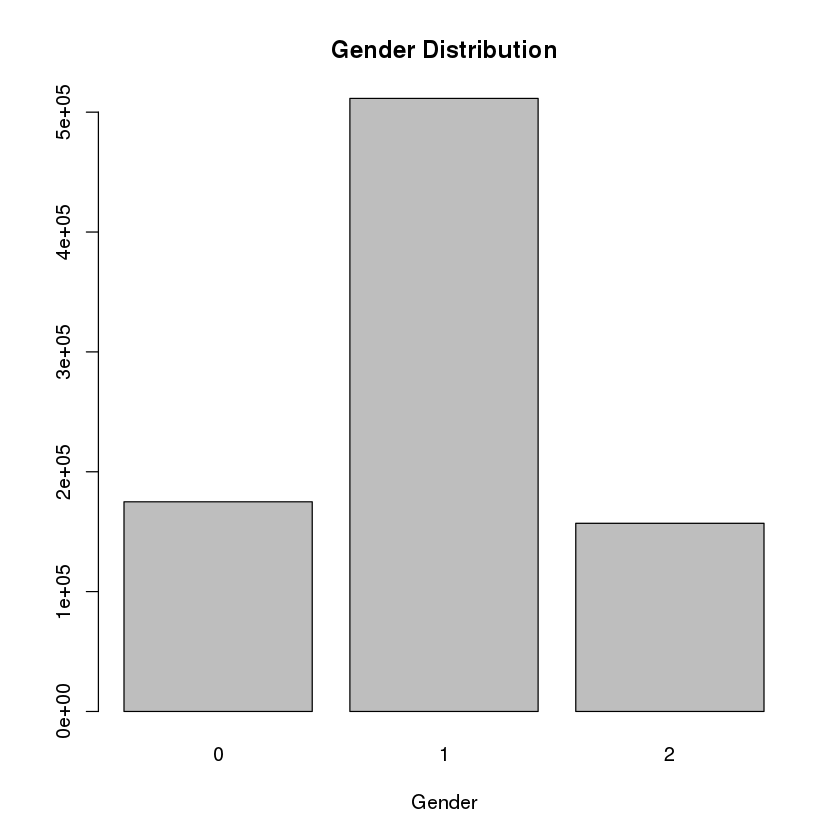

In [5]:
counts <- table(data$gender)
barplot(counts, main="Gender Distribution", 
  	xlab="Gender")

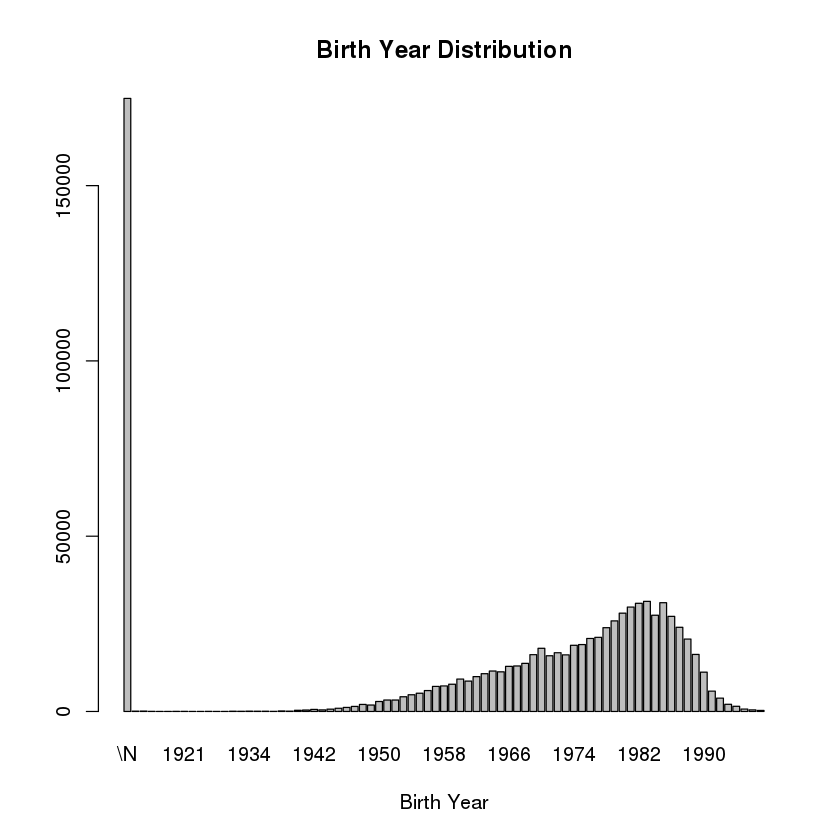

In [6]:
counts <- table(data$birth.year)
barplot(counts, main="Birth Year Distribution", 
  	xlab="Birth Year")

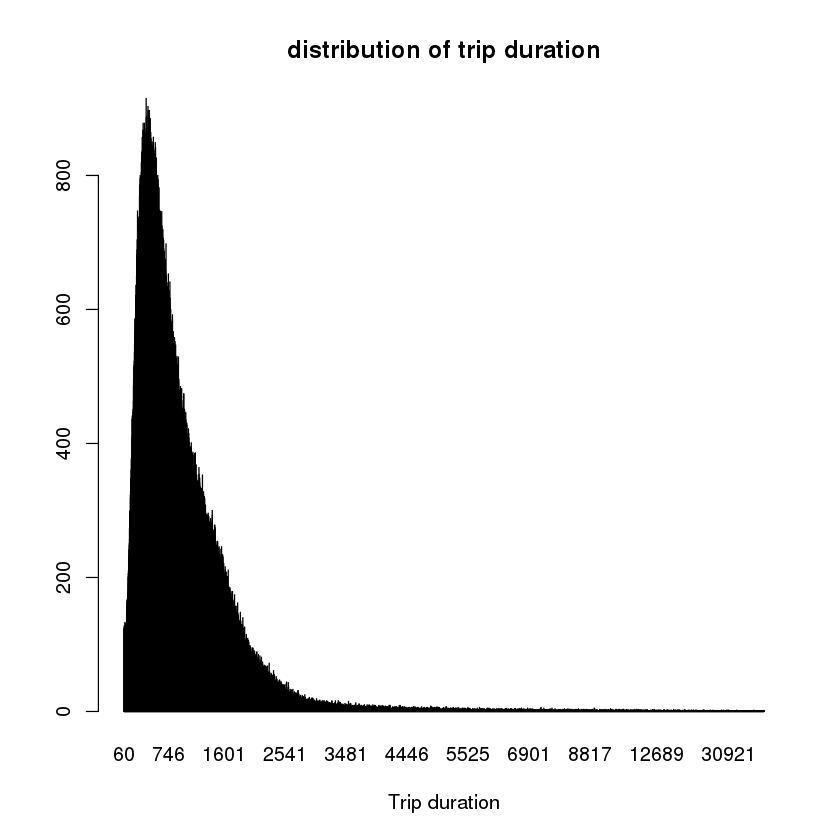

In [7]:
counts <- table(data$tripduration)
barplot(counts, main="distribution of trip duration", 
  	xlab="Trip duration")

In [8]:
apply(data, 2, function(x) any(is.na(x)))

tripduration               starttime                stoptime 
                  FALSE                   FALSE                   FALSE 
       start.station.id      start.station.name  start.station.latitude 
                  FALSE                   FALSE                   FALSE 
start.station.longitude          end.station.id        end.station.name 
                  FALSE                   FALSE                   FALSE 
   end.station.latitude   end.station.longitude                  bikeid 
                  FALSE                   FALSE                   FALSE 
               usertype              birth.year                  gender 
                  FALSE                   FALSE                   FALSE

In [9]:
max(unique(c(data$start.station.id , data$end.station.name )))

[1] 3002

In [10]:
library(igraph)
movement <- data.frame(from=c(data$start.station.id), to=c(data$end.station.id))
g <- graph.data.frame(movement, directed=TRUE)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [11]:
print(g)

IGRAPH f86488d DN-- 329 843416 -- 
+ attr: name (v/c)
+ edges from f86488d (vertex names):
 [1] 164->504  388->459  293->237  531->499  382->410  511->454  293->394 
 [8] 224->376  432->336  173->479  146->351  251->307  479->493  504->487 
[15] 479->493  474->128  477->485  470->450  494->458  345->455  406->237 
[22] 521->406  422->516  173->490  519->516  151->293  494->127  312->312 
[29] 487->439  352->490  483->511  285->531  225->423  483->433  146->495 
[36] 236->445  237->471  357->79   357->79   539->2003 382->347  251->368 
[43] 225->326  416->258  325->382  224->349  265->403  385->297  403->393 
[50] 357->79   482->322  430->343  161->2004 430->343  312->266  510->493 
+ ... omitted several edges


In [12]:
degree(g)

164   388   293   531   382   511   224   432   173   146   251   479   504 
 4630  7870 13905  5352  9886  4430  4245  6212  7025  4521  7691  7801  8379 
  474   477   470   494   345   406   521   422   519   151   312   487   352 
 6125 11074  6332  6490  7627  3195 13814  5854 13210 11433  7102  5213  7641 
  483   285   225   236   237   357   539   416   325   265   385   403   482 
 6506 14219  6222  7884  7567  5161  4564  2032  6044  4681  3299  5405  8698 
  430   161   510   507   247   445   239   476   540   449   497   362   467 
 3398  7253  6493  7954  4032  6248  1510  8157  6860  4313 16119  3352  3811 
  329   306   394   308   335   380   334   523   450   309   533   434  2008 
 7258  6192  5429  3246  5209  8565  7040  6995  7798  5177  4138  5847  2129 
  428   396   404   368   248   167   528   268   468   509   459   317   387 
 5559  1831  9002 11782  1804  5834  8689  5765  6372  7836 15897  5851 10460 
  373   320   489   462   375   157   402   442   116   534   393   128   294 
 1248  4997  5731  7973  7765  3456 11011  7918  6909  3527  3180  9408  7050 
  461   536  2004   305   472   410   486   448  2003   217   518   290   319 
 6885  5856  3869  8290  7171  6090  6245  6796  5102  4190  9283  7758  5435 
  336   143   499   392   412   229   524   485   323   322   348   401   284 
 5659  1828 12662   741  3906  7041  6605  5073  8541  2520  7793  7725  8767 
  515   443   493   512   469   400   147   423   168   405   478   458    79 
 7573   653  5751  4735  6881  1720  8234  3676  8739  7140  5919  5327 10165 
  439   324   426   546   453   366   480   389   223    72   307   160   508 
 8155  6359 15013  5745  7489  2623  4145  1755  4627  7083  5111  3324  4850 
  233   377   465   457   444   427   316   379   435   257   152   411   532 
 3560  5106  7277  9994 12100  7076  4263  5786  9777  4849  5309  2292  5115 
  295   350   384   417   466   301   446   195   318   460   264  2002   351 
 2148  4509  2151  8754  8980  6622  8266  6773  8743  1887  4841  3877  4881 
  500   440   242   297   414   369   498   254   505   365   327   296   447 
 5201  3991  1657  4915  2861  4928  7240  5445  5879  1250 13661  3874  7118 
  326   349   253   280   496   492   438   490   127   398   311   464   360 
 7248  3187  5296  4808  6418  8915  5200 10967  8732  3547  4188  4426  4138 
  355   281   332   376   454   529   261   415   527   475   520   276   517 
 4686 10845  2676  3928  3782  5908  2254  5061  5647  6790  4913  3861  7519 
  330  2009   391   516   471   545   271   279   436   488   120   238   433 
 4150   987  4472  3323  2065  5796  3386  1059   671  8518  1360  6207  6449 
  216   304   356   249   263   347   153   241   291   525   310   495   346 
 1547  7628  3206  3348  5887 10107  6075  1809  2574  3386  4005  5525  5294 
  342   361   363   456    82   513   522   386   367   437   395   212   228 
 3230  4517 12564  4949  2227  4391  5534  4929  5256  1001  2491  5874  4086 
  270   340   503   420   314   364   315   298   266   537   259  2021  2023 
 2103  2263  3512  1504  2315  1276  6080   864  1820  7971  3817  4815   701 
  354   481   339   303   262   328   250  2006   501   390   383   313   408 
 1070  1848  1041  6121  1399  5468  3584 11600  5502  1410  5082  1310  2510 
  514   243   258   484   441   144   341   473   174    83  2012   267   244 
 6966  3154  1070  4416  1608   787  1954  5719  3837  3478  1434  3702  1829 
 2022   282  2000   218   353   300   455   275   150   421   399   137   358 
 1717  1330  4213   986  1184  2159  4506   909  3337   760  1182  1359 10206 
  526   331   359   431   302   397  3002   274   343   278   538   463   232 
 3318  2306  5633   460  1858  1023  4245  2314  1011  1110  4240  7516  2342 
  344   289   419   337   409   245   260   418   252   407   321  2005  2001 
  759   627  1939  3792   664   736  2612  1636  4829   919   344   252   363 
  372   119  2017  2010 
  621   244  2476  2736

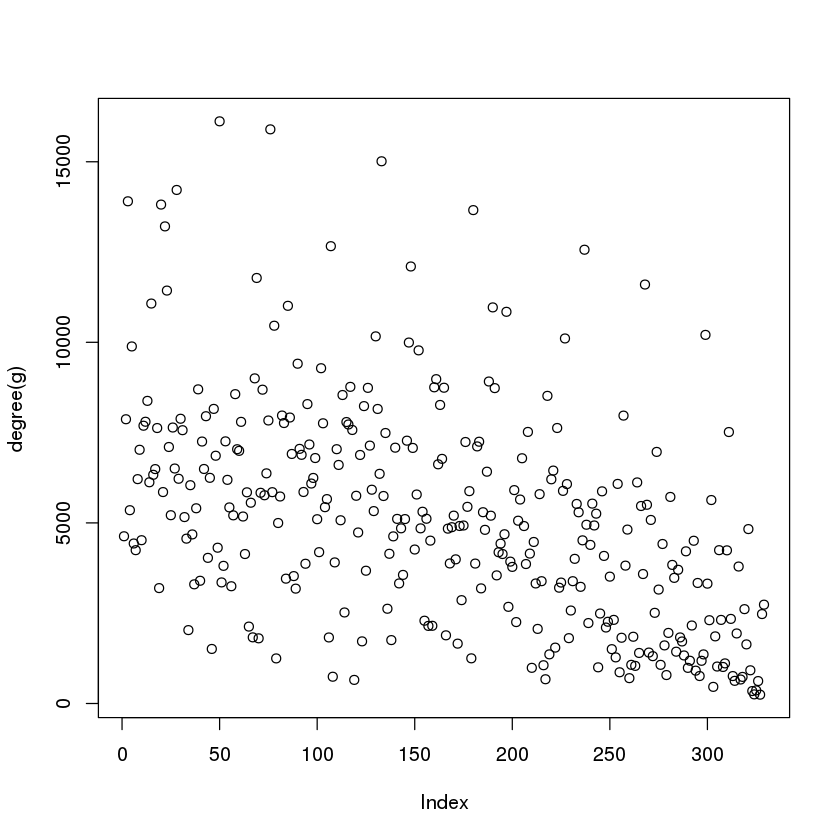

In [13]:
plot(degree(g))

In [14]:
degree_distribution(g)

[1] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
    [7] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [13] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [19] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [25] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [31] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [37] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [43] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [49] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [55] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [61] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [67] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [73] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [79] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [85] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [91] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
   [97] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [103] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [109] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [115] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [121] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [127] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [133] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [139] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [145] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [151] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [157] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [163] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [169] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [175] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [181] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [187] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [193] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [199] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [205] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [211] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [217] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [223] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [229] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [235] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [241] 0.000000000 0.000000000 0.000000000 0.000000000 0.003039514 0.000000000
  [247] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [253] 0.003039514 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [259] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [265] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [271] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [277] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [283] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [289] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [295] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [3

In [15]:
print(closeness(g))
print("in: ")
print(closeness(g, mode="in"))
print("out: ")
print(closeness(g, mode="out"))
print("all: ")
print(closeness(g, mode="all"))
print("betweenness ")
print(betweenness(g))
print("edge betweenness ")
print(edge_betweenness(g))

        164         388         293         531         382         511 
0.002439024 0.002506266 0.002816901 0.002785515 0.002801120 0.002439024 
        224         432         173         146         251         479 
0.002583979 0.002631579 0.002380952 0.002551020 0.002785515 0.002531646 
        504         474         477         470         494         345 
0.002583979 0.002493766 0.002638522 0.002518892 0.002557545 0.002577320 
        406         521         422         519         151         312 
0.002597403 0.002688172 0.002525253 0.002801120 0.002873563 0.002785515 
        487         352         483         285         225         236 
0.002557545 0.002481390 0.002680965 0.002808989 0.002444988 0.002808989 
        237         357         539         416         325         265 
0.002717391 0.002551020 0.002525253 0.001915709 0.002617801 0.002793296 
        385         403         482         430         161         510 
0.002352941 0.002732240 0.002604167 0.002298851 0.0

[1] "out: "
        164         388         293         531         382         511 
0.002439024 0.002506266 0.002816901 0.002785515 0.002801120 0.002439024 
        224         432         173         146         251         479 
0.002583979 0.002631579 0.002380952 0.002551020 0.002785515 0.002531646 
        504         474         477         470         494         345 
0.002583979 0.002493766 0.002638522 0.002518892 0.002557545 0.002577320 
        406         521         422         519         151         312 
0.002597403 0.002688172 0.002525253 0.002801120 0.002873563 0.002785515 
        487         352         483         285         225         236 
0.002557545 0.002481390 0.002680965 0.002808989 0.002444988 0.002808989 
        237         357         539         416         325         265 
0.002717391 0.002551020 0.002525253 0.001915709 0.002617801 0.002793296 
        385         403         482         430         161         510 
0.002352941 0.002732240 0.002604167 0.0

[1] "betweenness "
         164          388          293          531          382          511 
  28.9275737   45.2856147  392.8410224  178.3235286  258.4205055   26.7477104 
         224          432          173          146          251          479 
 104.0862049   67.8058648   31.4079660   52.9766051  167.1935520   47.2515969 
         504          474          477          470          494          345 
  94.8234350   52.4673296  127.8412899   41.7223127   40.2961079   54.4322702 
         406          521          422          519          151          312 
 137.2030852  397.7112539   36.7081161  428.5805904  429.2871717  169.0999338 
         487          352          483          285          225          236 
  40.3282673   36.3704696   92.2934820  370.4252011   28.9584585  137.2179947 
         237          357          539          416          325          265 
  81.5351861   33.6726890  452.3723810   51.7018771   45.3930681  136.4971638 
         385          403        

[1] "edge betweenness "
    [1]  0.06962251  0.08098134  0.04300647  0.16102565  0.07246525  0.11214481
    [7]  0.04127852  0.08930603  0.09060650  0.02645072  0.09884140  0.09707486
   [13]  0.03545884  0.03154698  0.03545884  0.08825946  0.06578745  0.06739531
   [19]  0.09061039  0.36244505  0.20263299  0.39455617  0.25097745  0.04888203
   [25]  0.10338258  0.01710767  0.09450095  0.00000000  0.18749290  0.05046805
   [31]  0.05904752  0.07019301  0.09474228  0.02855388  0.38341232  0.03798308
   [37]  0.44079387  0.10414570  0.10414570  0.58997505  0.04492177  0.03391156
   [43]  0.10592609  0.12720018  0.09182832  0.16449460  0.20349818  0.19473710
   [49]  0.06716810  0.10414570  0.62668888  0.31044602  0.10815581  0.31044602
   [55]  0.42365621  0.07085389  0.10411744  0.12327035  0.06390952  0.09831663
   [61]  0.04719635  0.06007951  0.04916106  0.03993271  0.06467891  0.07890148
   [67]  0.12663576  0.11380427  0.66764409  0.04364404  0.20555005  0.17932882
   [73]  0.05476

In [ ]:
plot(g)